## State and Memory

Importing the required library

In [27]:
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.tools import tool
from langgraph.graph import StateGraph,START,END

Creating the Simple State using pydantic

Convering the Reducers. 

In [ ]:
from typing import Annotated
from pydantic import BaseModel
from operator import add

class StateSchema(BaseModel):
    foo:Annotated[list[int],add]

Creating the Node

In [59]:
def node_1(state:StateSchema)->StateSchema:
    return StateSchema(foo=[1])

def node_2(state:StateSchema)->StateSchema:
    return StateSchema(foo=[2])

def node_3(state:StateSchema)->StateSchema:
    return StateSchema(foo=[3])


Creating the Sample Graph

In [60]:
graph = StateGraph(StateSchema)
graph.add_node("node_1",node_1)
graph.add_node("node_2",node_2)
graph.add_node("node_3",node_3)

graph.add_edge(START,"node_1")
graph.add_edge("node_1","node_2")
graph.add_edge("node_1","node_3")
graph.add_edge("node_2",END)
graph.add_edge("node_3",END)

compiled_graph = graph.compile()


Displaying the Diagram

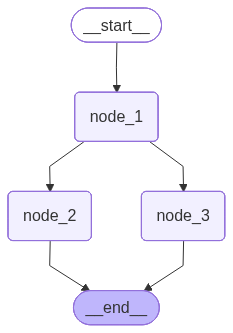

In [61]:
from IPython.display import display,Image

display(Image(compiled_graph.get_graph().draw_mermaid_png()))

Invoking the Graph

In [62]:
responses = compiled_graph.invoke(StateSchema(foo=[0]),debug=True)
print(responses)

[] [0]
[values] {'foo': [0]}
[0] [1]
[updates] {'node_1': {'foo': [1]}}
[values] {'foo': [0, 1]}
[updates] {'node_2': {'foo': [2]}}
[updates] {'node_3': {'foo': [3]}}
[0, 1] [2]
[0, 1, 2] [3]
[values] {'foo': [0, 1, 2, 3]}
{'foo': [0, 1, 2, 3]}


Creating the Custom Reducers

In [68]:
def removeLast2Digits(first:list[int],second:list[int])->list[int]:
    if len(first)==0:
        return second
    if len(first)>=2:
        first = first[-(len(first)-2):]
    first.extend(second)
    return first

In [69]:
class StateSchemaDigit(BaseModel):
    foo:Annotated[list[int],removeLast2Digits]

In [70]:
def node_1(state:StateSchemaDigit)->StateSchemaDigit:
    return StateSchemaDigit(foo=[1])

def node_2(state:StateSchemaDigit)->StateSchemaDigit:
    return StateSchemaDigit(foo=[2])

def node_3(state:StateSchemaDigit)->StateSchemaDigit:
    return StateSchemaDigit(foo=[3])


In [71]:
graph = StateGraph(StateSchemaDigit)
graph.add_node("node_1",node_1)
graph.add_node("node_2",node_2)
graph.add_node("node_3",node_3)

graph.add_edge(START,"node_1")
graph.add_edge("node_1","node_2")
graph.add_edge("node_1","node_3")
graph.add_edge("node_2",END)
graph.add_edge("node_3",END)

compiled_graph = graph.compile()


In [72]:
responses = compiled_graph.invoke(StateSchemaDigit(foo=[0]),debug=True)
print(responses)

[values] {'foo': [0]}
[updates] {'node_1': {'foo': [1]}}
[values] {'foo': [0, 1]}
[updates] {'node_2': {'foo': [2]}}
[updates] {'node_3': {'foo': [3]}}
[values] {'foo': [2, 3]}
{'foo': [2, 3]}
